<h2><div style="font-family: Trebuchet MS; background-color: BLACK; color: #FFFFFF; padding: 12px; line-height: 1.5;"> | Impact of Medication for Lifestyle Diseases on Hospital Readmission 📚</div> 

Problem Statement and Objective A hospital readmission is when a patient who is discharged from the hospital, gets re-admitted again within a certain period of time. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely. For this reason, Centers for Medicare & Medicaid Services established the Hospital Readmissions Reduction Program which aims to improve quality of care for patients and reduce health care spending by applying payment penalties to hospitals that have more than expected readmission rates for certain conditions. Although diabetes is not yet included in the penalty measures, the program is regularly adding new disease conditions to the list, now totaling 6 for FY2018. In 2011, American hospitals spent over $41 billion on diabetic patients who got readmitted within 30 days of discharge. Being able to determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care. So, with that background in mind,

<h2><div style="font-family: Trebuchet MS; background-color: BLACK; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Data Set Description 📚</div> 



**VARIABLE NAMES**: DESCRIPTION
* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission





<h2><div style="font-family: Trebuchet MS; background-color: BLACK; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Data  Pre-processing 📚</div> 

In [ ]:
import pandas as pd #for reading datasets 
import numpy as np   #numerical operations
import matplotlib.pyplot as plt #datavisualiztion ploting a graph
import seaborn as sns

In [20]:
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Train-1617360447408-1660719685476 (1).csv")

In [21]:
df

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,39934,124202466,23450508,Caucasian,Female,[70-80),?,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),?,4,?,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),?,2,?,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,?,Female,[80-90),?,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0


In [22]:
df.shape

(66587, 49)

<h2><div style="font-family: Trebuchet MS; background-color: BLACK; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Chacking Missing Values 📚</div> 

In [23]:
missing_values_count = df.isnull().sum()


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [25]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21             

<AxesSubplot:>

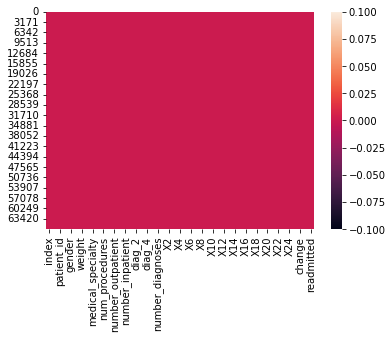

In [26]:
sns.heatmap(df.isnull())

In [27]:
df = df.drop(['weight','medical_specialty'], axis = 1)

In [28]:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 2


In [29]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [30]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())
            
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
diag_4 0
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0
gender 0


In [31]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [32]:
keys = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15','X16', 'X17', 'X18', 'X19', 'X20', 'X21','X22','X23','X24','X25']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts()

2    46498
3    16702
4      872
5       53
6        3
Name: numchange, dtype: int64

In [33]:
df.shape

(64128, 49)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64128 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                64128 non-null  int64  
 1   encounter_id         64128 non-null  int64  
 2   patient_id           64128 non-null  int64  
 3   race                 64128 non-null  object 
 4   gender               64128 non-null  object 
 5   age                  64128 non-null  object 
 6   time_in_hospital     64128 non-null  int64  
 7   num_lab_procedures   64128 non-null  int64  
 8   num_procedures       64128 non-null  int64  
 9   num_medications      64128 non-null  int64  
 10  number_outpatient    64128 non-null  int64  
 11  number_emergency     64128 non-null  int64  
 12  number_inpatient     64128 non-null  int64  
 13  diag_1               64128 non-null  object 
 14  diag_2               64128 non-null  object 
 15  diag_3               64128 non-null 

In [35]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
diag_4 0
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0


In [36]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

In [37]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     16465
7     14406
6     11022
9     10761
5      6048
4      2271
10     1786
3      1037
2       292
1        40
Name: age, dtype: int64

In [38]:
df2 = df.drop_duplicates(subset= ['patient_id'], keep = 'first')
df2.shape

(38078, 49)

In [39]:
df.head().T

,0,1,2,3,4
index,69375,57272,82347,89608,24091
encounter_id,197029140,163571946,256497366,289891212,81873900
patient_id,51521940,92631357,30023982,93606021,23464296
race,Hispanic,Caucasian,Caucasian,AfricanAmerican,Caucasian
gender,1,1,0,0,1
age,9,7,6,8,8
time_in_hospital,4,3,6,5,9
num_lab_procedures,39,34,50,63,17
num_procedures,1,1,2,0,1
num_medications,9,12,24,14,11


In [40]:
df['readmitted'].value_counts()

0    34128
1    30000
Name: readmitted, dtype: int64

<h2><div style="font-family: Trebuchet MS; background-color: BLACK; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Converting Catagerical to Numerical Values 📚</div> 

In [41]:
# Creating additional columns for diagnosis# Creati 
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [42]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [43]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [49]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

In [50]:
df

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diabetesMed,readmitted,service_utilization,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
0,69375,197029140,51521940,Hispanic,1,9,4,39,1,9,...,1,1,6,2,783.0,0.0,403.00,2.0,585.0,17.0
1,57272,163571946,92631357,Caucasian,1,7,3,34,1,12,...,0,0,0,2,564.0,12.0,788.00,18.0,569.0,12.0
2,82347,256497366,30023982,Caucasian,0,6,6,50,2,24,...,1,1,5,3,574.0,12.0,403.00,2.0,585.0,17.0
3,89608,289891212,93606021,AfricanAmerican,0,8,5,63,0,14,...,1,1,0,3,401.0,2.0,783.00,0.0,250.0,14.0
4,24091,81873900,23464296,Caucasian,1,8,9,17,1,11,...,0,1,0,2,311.0,22.0,276.00,20.0,300.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66581,4840,26333250,7209585,Caucasian,0,8,1,10,1,11,...,0,0,0,2,433.0,3.0,250.01,14.0,401.0,2.0
66582,39934,124202466,23450508,Caucasian,0,8,11,40,4,35,...,1,0,0,2,562.0,12.0,276.00,20.0,458.0,3.0
66583,47366,145667070,29324601,Caucasian,1,9,4,39,1,7,...,0,1,0,2,188.0,19.0,599.00,17.0,591.0,17.0
66584,76555,231061116,2179062,Caucasian,0,7,2,24,1,13,...,1,1,2,2,996.0,15.0,414.00,2.0,250.0,14.0


<h2><div style="font-family: Trebuchet MS; background-color: BLACK; color: #FFFFFF; padding: 12px; line-height: 1.5;">  DATA VISUALIZATION 📚</div> 

C:\Users\LENOVO\cond\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distrinution of Readmission')

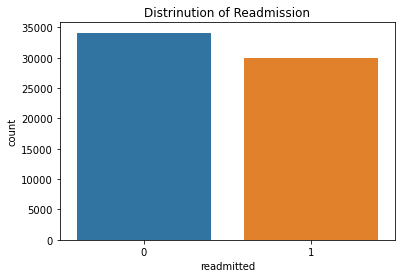

In [51]:
sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

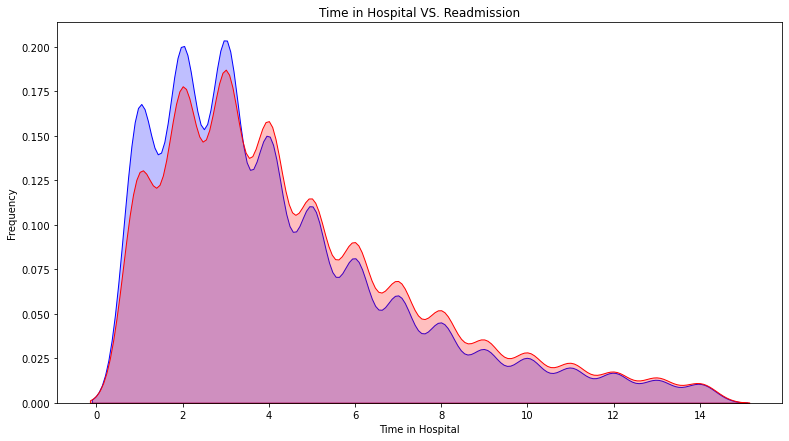

In [52]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

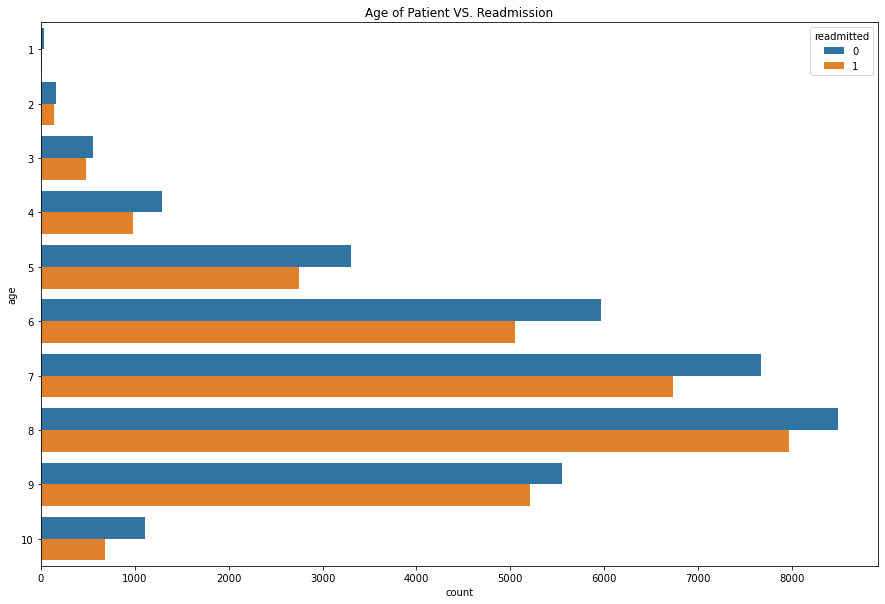

In [53]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

<AxesSubplot:xlabel='count', ylabel='race'>

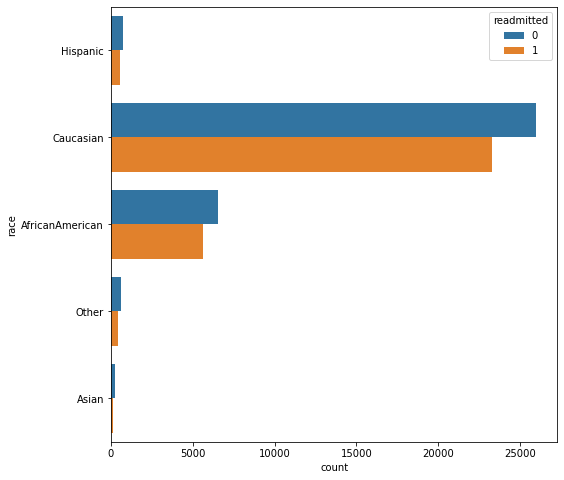

In [54]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

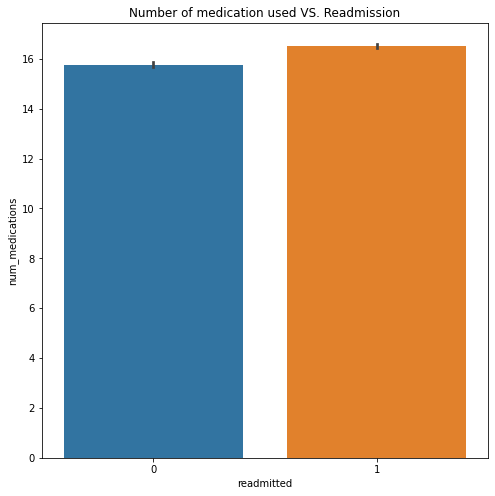

In [55]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

C:\Users\LENOVO\cond\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

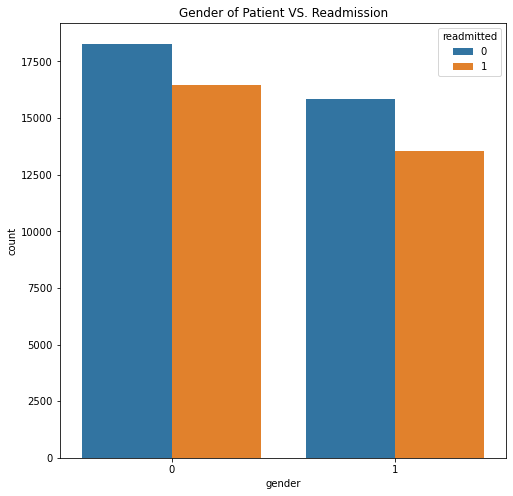

In [56]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

C:\Users\LENOVO\cond\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Change of Medication VS. Readmission')

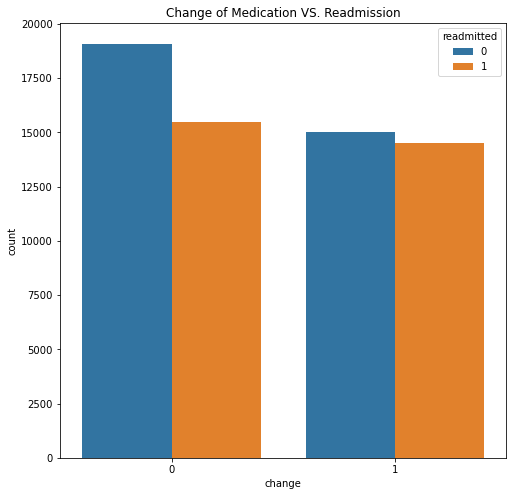

In [57]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['change'], hue = df['readmitted']).set_title('Change of Medication VS. Readmission')

C:\Users\LENOVO\cond\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

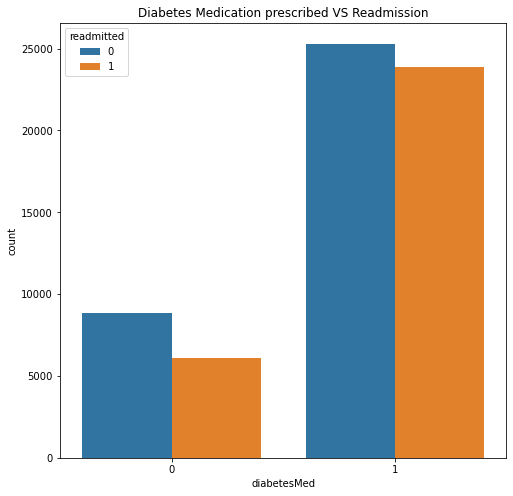

In [58]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

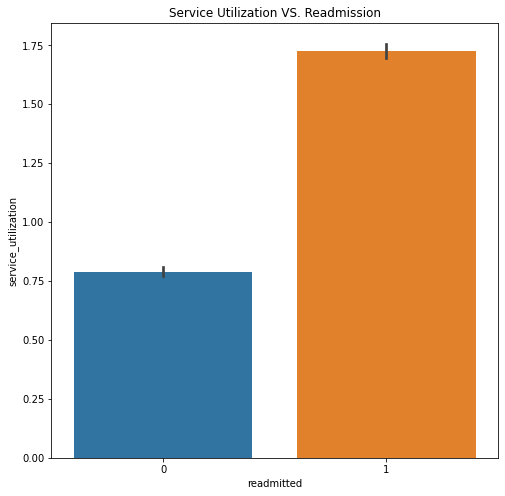

In [59]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

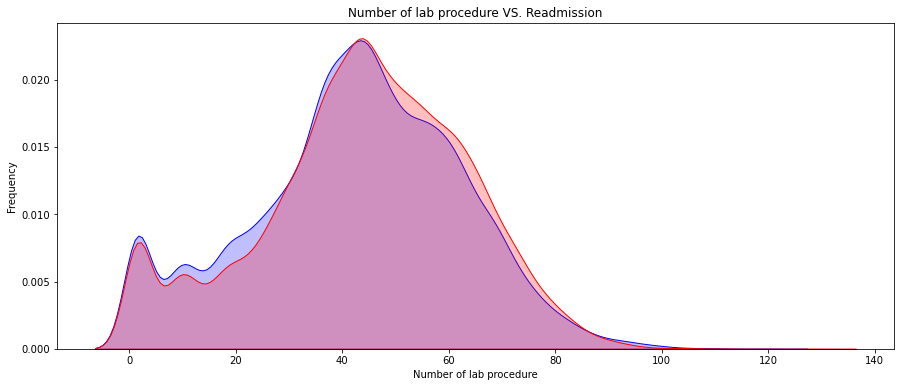

In [60]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

In [61]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     16465
7     14406
6     11022
9     10761
5      6048
4      2271
10     1786
3      1037
2       292
1        40
Name: age, dtype: int64
75    16465
65    14406
55    11022
85    10761
45     6048
35     2271
95     1786
25     1037
15      292
5        40
Name: age, dtype: int64


In [62]:
df

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diabetesMed,readmitted,service_utilization,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
0,69375,197029140,51521940,Hispanic,1,85,4,39,1,9,...,1,1,6,2,783.0,0.0,403.00,2.0,585.0,17.0
1,57272,163571946,92631357,Caucasian,1,65,3,34,1,12,...,0,0,0,2,564.0,12.0,788.00,18.0,569.0,12.0
2,82347,256497366,30023982,Caucasian,0,55,6,50,2,24,...,1,1,5,3,574.0,12.0,403.00,2.0,585.0,17.0
3,89608,289891212,93606021,AfricanAmerican,0,75,5,63,0,14,...,1,1,0,3,401.0,2.0,783.00,0.0,250.0,14.0
4,24091,81873900,23464296,Caucasian,1,75,9,17,1,11,...,0,1,0,2,311.0,22.0,276.00,20.0,300.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66581,4840,26333250,7209585,Caucasian,0,75,1,10,1,11,...,0,0,0,2,433.0,3.0,250.01,14.0,401.0,2.0
66582,39934,124202466,23450508,Caucasian,0,75,11,40,4,35,...,1,0,0,2,562.0,12.0,276.00,20.0,458.0,3.0
66583,47366,145667070,29324601,Caucasian,1,85,4,39,1,7,...,0,1,0,2,188.0,19.0,599.00,17.0,591.0,17.0
66584,76555,231061116,2179062,Caucasian,0,65,2,24,1,13,...,1,1,2,2,996.0,15.0,414.00,2.0,250.0,14.0


In [63]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_id', 'gender','age','time_in_hospital', 'num_lab_procedures', 'num_procedures',\
          'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_5', 'number_diagnoses', 'X3', \
          'X4', 'X5', 'X6', 'X7', 'X8', 'X9','X10', \
          'X11', 'X12', 'X13', 'X14', 'X15', \
          'X16', 'X17', 'X18','X19','X20', 'X21', 'X22', 'X23', 'X24', 'X25','change', 'diabetesMed', \
            'level1_diag1','level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3', 'level2_diag3']

df[i] = df[i].astype('object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64128 entries, 0 to 66586
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                64128 non-null  int64 
 1   encounter_id         64128 non-null  object
 2   patient_id           64128 non-null  object
 3   race                 64128 non-null  object
 4   gender               64128 non-null  object
 5   age                  64128 non-null  object
 6   time_in_hospital     64128 non-null  object
 7   num_lab_procedures   64128 non-null  object
 8   num_procedures       64128 non-null  object
 9   num_medications      64128 non-null  object
 10  number_outpatient    64128 non-null  object
 11  number_emergency     64128 non-null  object
 12  number_inpatient     64128 non-null  object
 13  diag_1               64128 non-null  object
 14  diag_2               64128 non-null  object
 15  diag_3               64128 non-null  object
 16  diag

In [153]:
df.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted', 'numchange', 'level1_diag1',
       'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
       'level2_diag3', 'service_utilization_log1p',
       'num_medications|time_in_hospital', 'num_medications|num_procedures',
       'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diagnoses|time_in_hospital',
       'num_medications|numchange'],
      dtype='object')

In [65]:
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['numchange', 'service_utilization', 'index']

In [66]:
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [67]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,numchange,1.389948,1.225071,0.488620,No,NA,1.389948,1.225071,0.488620
1,service_utilization,4.790742,48.669856,2.275043,Yes,log1p,1.071386,0.411971,0.665277
2,index,-0.021294,-1.198056,29405.046857,No,NA,-0.021294,-1.198056,29405.046857


In [68]:
for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [69]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [70]:
df.shape

(64128, 52)

In [71]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['numchange', 'index', 'service_utilization_log1p']

In [72]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_id = df.patient_id.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

In [73]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [74]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5'], axis=1, inplace=True)

In [75]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [76]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [77]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,9,4,36
1,12,3,36
2,24,6,144
3,14,5,70
4,11,9,99


In [78]:
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [79]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_id'], keep = 'first')
df2.shape

(38078, 56)

In [80]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [81]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

C:\Users\LENOVO\cond\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [82]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df2.drop(['patient_id', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

,index,change,diabetesMed,readmitted,numchange,service_utilization_log1p
index,1.000000,0.104599,0.055853,-0.040039,0.110241,0.102211
change,0.104599,1.000000,0.505966,0.040831,0.640099,0.047838
diabetesMed,0.055853,0.505966,1.000000,0.066847,0.323868,0.054439
readmitted,-0.040039,0.040831,0.066847,1.000000,0.047232,0.207011
numchange,0.110241,0.640099,0.323868,0.047232,1.000000,0.068006
service_utilization_log1p,0.102211,0.047838,0.054439,0.207011,0.068006,1.000000


In [83]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 
                                       'X1', 'X2', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)      
df_pd.drop(['race'], inplace=True, axis=1)

In [84]:
non_num_cols = ['race', 'gender',   
                'X1', 'X2', 'diag_4' ]

In [85]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['numchange',
 'patient_id',
 'service_utilization_log1p',
 'encounter_id',
 'diabetesMed',
 'index']

In [86]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [87]:
new_non_num_cols

['gender_1',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X1_>300',
 'X1_None',
 'X1_Norm',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X2_>8',
 'X2_None',
 'X2_Norm']

In [88]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [132]:
df_pd

,index,encounter_id,patient_id,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,X3,...,level1_diag1_995.0,level1_diag1_996.0,level1_diag1_997.0,level1_diag1_998.0,level1_diag1_999.0,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,0.635329,197029140,51521940,85,4,39,1,9,9,0,...,0,0,0,0,0,0,0,0,1,0
1,0.224652,163571946,92631357,65,3,34,1,12,6,0,...,0,0,0,0,0,0,0,1,0,0
2,1.075494,256497366,30023982,55,6,50,2,24,9,0,...,0,0,0,0,0,0,0,1,0,0
3,1.321873,289891212,93606021,75,5,63,0,14,7,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.901242,81873900,23464296,75,9,17,1,11,9,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66580,-1.267130,53093892,106550685,65,6,58,0,19,9,0,...,0,0,0,0,0,0,0,1,0,0
66581,-1.554465,26333250,7209585,75,1,10,1,11,6,0,...,0,0,0,0,0,0,0,1,0,0
66582,-0.363659,124202466,23450508,75,11,40,4,35,6,0,...,0,0,0,0,0,0,0,1,0,0
66584,0.878960,231061116,2179062,65,2,24,1,13,6,1,...,0,1,0,0,0,0,0,1,0,0


In [179]:
feature_set = ['gender_1',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X1_>300',
 'X1_None',
 'X1_Norm',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X2_>8',
 'X2_None',
 'X2_Norm','encounter_id','age','time_in_hospital','num_lab_procedures','num_procedures']

In [180]:
X = df_pd[feature_set]
y = df_pd['readmitted']

In [181]:
df_pd['readmitted'].value_counts()

0    22778
1    14448
Name: readmitted, dtype: int64

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #19AADE; text-align: center; line-height: 1.25;"><b> Building Model 📊 <span style="color: #000000"></span></b></h1>
<hr>

In [182]:
#importing performance matrix from sklearn
from sklearn.metrics import accuracy_score
#importing spliting data from sklearn
from sklearn.model_selection import train_test_split
#importing standarlization from sklearn
from sklearn.preprocessing import StandardScaler
#importing confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#importing f1 score from sklearn
from sklearn.metrics import f1_score

#Importing KNN from sk-learn
model= KNeighborsClassifier(algorithm = 'brute',n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.20, random_state=0)
model.fit(X_train,y_train)
#predicting our model
y_pred = model.predict(X_test)
#printing predicted accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

#predicting x train
train_predictions = model.predict(X_train)
#predicting x test
test_predictions = model.predict(X_test)

#Knn train data accuracy
knn_accuracy=accuracy_score(y_train,train_predictions)
#f1 score for class no
f1_score_NO=f1_score(y_train,train_predictions,pos_label=0)
#f1 score for class yes
f1_score_YES=f1_score(y_train,train_predictions,pos_label=1)

#printing train data accuracy
print(" KNN TRAIN DATA accuracy 'Y'",knn_accuracy)#accuracy score for train data
#printing f1 score for class N
print("\n f1-score for class 'N'",f1_score_NO)#f1 score for train data fraud class is NO
#printing f1 score for class Y
print("\n f1-score for class 'Y'",f1_score_YES)#f1 score for train data in fraud class is YES

In [183]:
#Importing KNN from sk-learn
model= KNeighborsClassifier(algorithm = 'brute',n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.20, random_state=0)
model.fit(X_train,y_train)
#predicting our model
y_pred = model.predict(X_test)
#printing predicted accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.5970491803278688


In [184]:
#predicting x train
train_predictions = model.predict(X_train)
#predicting x test
test_predictions = model.predict(X_test)

In [185]:
#Knn train data accuracy
knn_accuracy=accuracy_score(y_train,train_predictions)
#f1 score for class no
f1_score_NO=f1_score(y_train,train_predictions,pos_label=0)
#f1 score for class yes
f1_score_YES=f1_score(y_train,train_predictions,pos_label=1)

In [186]:
#printing train data accuracy
print(" KNN TRAIN DATA accuracy 'Y'",knn_accuracy)#accuracy score for train data
#printing f1 score for class N
print("\n f1-score for class 'N'",f1_score_NO)#f1 score for train data fraud class is NO
#printing f1 score for class Y
print("\n f1-score for class 'Y'",f1_score_YES)#f1 score for train data in fraud class is YES

 KNN TRAIN DATA accuracy 'Y' 0.7675657948675904

 f1-score for class 'N' 0.8403626330311391

 f1-score for class 'Y' 0.5727204220045214


In [187]:
#Knn test data accuracy
Test_knn_accuracy=accuracy_score(y_test,test_predictions)
#f1 score for class no
f1_score_NO=f1_score(y_test,test_predictions,pos_label=0)
#f1 score for class yes
f1_score_YES=f1_score(y_test,test_predictions,pos_label=1)

In [188]:
### printing test data accuracy
print("KNN Test data accuracy",Test_knn_accuracy)#accuracy score for train data
#printing f1 score for class N  
print("\n f1-score for class 'N'",f1_score_NO)#f1 score for test data fraud class is NO
#printing f1 score for class Y      
print("\n f1-score for class 'Y'",f1_score_YES)#f1 score for test data fraud class is YES

KNN Test data accuracy 0.5970491803278688

 f1-score for class 'N' 0.7222598870056497

 f1-score for class 'Y' 0.2662686567164179


In [ ]:
pred1 = pd.DataFrame(test_pred1, columns=['readmite']).to_csv('submission.csv')